# This notebook is for the Fair-Shapely experiment

In [1]:
%reload_ext autoreload
%autoreload 2

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

### 2. Import dataset

In [3]:
from src.data.unified_dataloader import load_dataset
_, processed_adult = load_dataset('adult')

In [4]:
processed_adult.head(3)

,age,education-num,capital-gain,capital-loss,hours-per-week,sex,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income
0,0.030671,1.134739,0.148453,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.837109,1.134739,-0.145920,-0.21666,-2.222153,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,-0.042642,-0.420060,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


### 3. Split label/unlabel data, split train/test data.

In [5]:
'''census income kdd dataset'''
# sampled_data = processed_census_income_kdd.sample(frac=0.02, random_state=25)  # 2% of the data
# df = sampled_data.copy()
# X = df.drop('class', axis=1)
# y = df['class']
# X.shape


'''Adult dataset'''
df = processed_adult.copy()
# df = processed_adult.sample(frac=0.2, random_state=25)  # 20% of the data
X = df.drop('income', axis=1)
y = df['income']
X.shape

(32561, 106)

In [6]:
from src.evaluation.five_fold_cross_validation import evaluate_model
model = XGBClassifier()
evaluate_model(model=model, X_train=X, y_train=y, num_folds=5, dataset_name='adult', fairshap_base='DP')

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-------------------------------------
-------------1th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (12045, 106)
X_train_majority_label1 shape: (5391, 106)
X_train_minority_label0 shape: (7649, 106)
X_train_minority_label1 shape: (963, 106)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 66
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 307
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改373个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results\adult\fairSHAP-DP_1-fold_results.csv
-------------------------------------
-------------2th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (12107, 106)
X_train_majority_label1 shape: (5366, 106)
X_train_minority_label0 shape: (7612, 106)
X_train_minority_label1 shape: (964, 106)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_maj

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 60
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 326
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改386个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results\adult\fairSHAP-DP_2-fold_results.csv
-------------------------------------
-------------3th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (12091, 106)
X_train_majority_label1 shape: (5300, 106)
X_train_minority_label0 shape: (7719, 106)
X_train_minority_label1 shape: (939, 106)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_maj

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 51
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 291
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改342个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results\adult\fairSHAP-DP_3-fold_results.csv
-------------------------------------
-------------4th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (12172, 106)
X_train_majority_label1 shape: (5302, 106)
X_train_minority_label0 shape: (7640, 106)
X_train_minority_label1 shape: (935, 106)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_majority_label0中找到合适的值替换X_train_minority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_


4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 58
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 318
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改376个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results\adult\fairSHAP-DP_4-fold_results.csv
-------------------------------------
-------------5th fold----------------
-------------------------------------
1. Split the adult dataset into majority group and minority group according to the number of sensitive attribute, besides split by label 0 and label 1
X_train_majority_label0 shape: (12097, 106)
X_train_majority_label1 shape: (5289, 106)
X_train_minority_label0 shape: (7748, 106)
X_train_minority_label1 shape: (915, 106)
2. 初始化FairnessExplainer
--------接下来先对minority group进行修改--------
3(a). 将X_train_minority_label0与X_train_majority_label0进行匹配
3(b). 将X_train_minority_label1与X_train_majority_label1进行匹配
4(a). 使用FairSHAP, 从 X_train_maj

c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用FairSHAP, 从 X_train_majority_label1中找到合适的值替换X_train_minority_label1中的数据
5. 计算出varphi和q
在X_train_minority中shapely value中大于0.1的值的个数有: 48
--------接下来对majority group进行修改--------
3(a). 将X_train_majority_label0与X_train_minority_label0进行匹配
3(b). 将X_train_majority_label1与X_train_minority_label1进行匹配
4(a). 使用fairshap, 从 X_train_minority_label0中找到合适的值替换X_train_majority_label0中的数据


c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2300: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
c:\Users\ZhuLi\Anaconda3\envs\unlabel_fair\lib\site-packages\sklearn\linear_model\_least_angle.py:2299: RuntimeWarning: divide by zero encountered in log
  n_samples * np.l

4(b). 使用fairshap, 从 X_train_minority_label1中找到合适的值替换X_train_majority_label1中的数据
5. 计算出varphi和q
在X_train_majority中shapely value中大于0.1的值的个数有: 293
6. 计算original model在X_test上的accuracy, DR, DP, EO, PP
7. 开始整理minority部分的修改和majority部分的修改并且合并新数据,共修改341个数据点, 使用new training set训练新模型
8. 保存结果到csv文件
CSV 文件已保存：saved_results\adult\fairSHAP-DP_5-fold_results.csv


### 4. read saved_csv file and make plots

In [1]:
def extract_original_values(fold):
    original_DR = fold.loc[0,'new_DR']
    original_DP = fold.loc[0,'new_DP']
    original_EO = fold.loc[0,'new_EO']
    original_PQP = fold.loc[0,'new_PQP']
    return original_DR, original_DP, original_EO, original_PQP

In [2]:
''' german credit dataset '''
import pandas as pd
import numpy as np
fold1 = pd.read_csv('saved_results/adult/1-fold_results.csv')
fold2 = pd.read_csv('saved_results/adult/2-fold_results.csv')
fold3 = pd.read_csv('saved_results/adult/3-fold_results.csv')
fold4 = pd.read_csv('saved_results/adult/4-fold_results.csv')
fold5 = pd.read_csv('saved_results/adult/5-fold_results.csv')

fold1_original_DR, fold1_original_DP, fold1_original_EO, fold1_original_PQP = extract_original_values(fold1)
fold2_original_DR, fold2_original_DP, fold2_original_EO, fold2_original_PQP = extract_original_values(fold2)
fold3_original_DR, fold3_original_DP, fold3_original_EO, fold3_original_PQP = extract_original_values(fold3)
fold4_original_DR, fold4_original_DP, fold4_original_EO, fold4_original_PQP = extract_original_values(fold4)
fold5_original_DR, fold5_original_DP, fold5_original_EO, fold5_original_PQP = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_drs = [fold1_original_DR, fold2_original_DR, fold3_original_DR, fold4_original_DR, fold5_original_DR]
original_dps = [fold1_original_DP, fold2_original_DP, fold3_original_DP, fold4_original_DP, fold5_original_DP]  
original_eos = [fold1_original_EO, fold2_original_EO, fold3_original_EO, fold4_original_EO, fold5_original_EO]
original_pqps = [fold1_original_PQP, fold2_original_PQP, fold3_original_PQP, fold4_original_PQP, fold5_original_PQP]


#### 4.1 直接plot_results

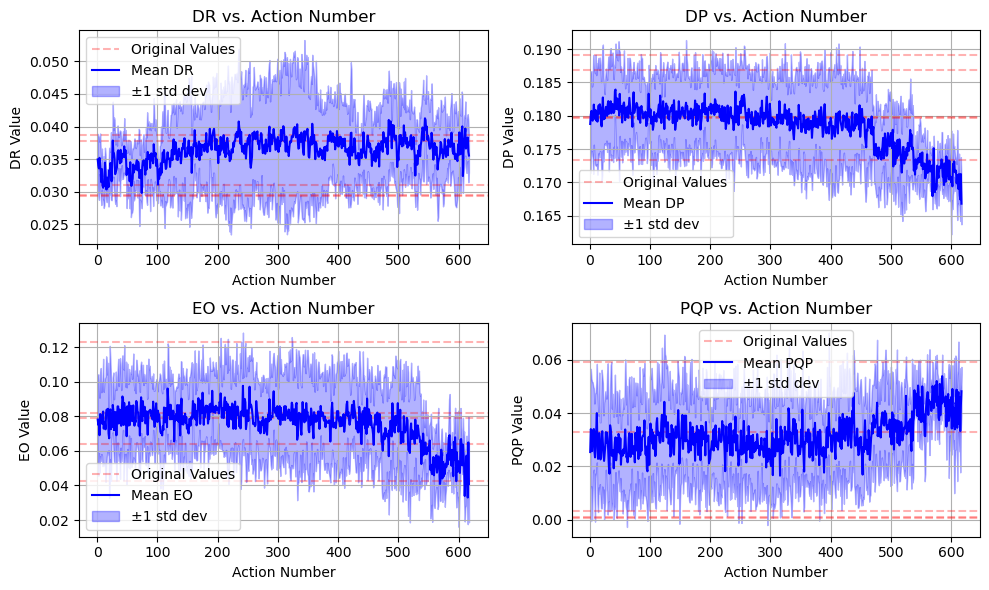

In [3]:
from src.visualization.visualization2 import plot_results

# 调用函数
plot_results(
    folds=folds,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    stop_when_no_data=3,
    min_action=1,
    figsize=(10, 6),
    fill_alpha=0.3,
    fill_color='b',
    red_alpha=0.3  # 红线透明度
)

#### 4.2 画图每个fold相对自己original value的提升

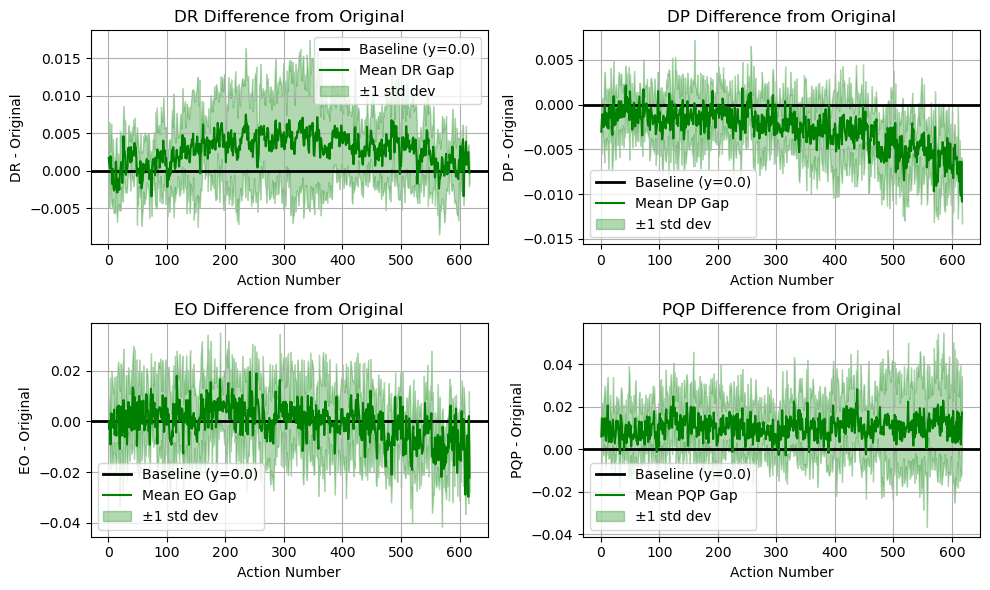

In [ ]:
from src.visualization.visualization1 import plot_fairness_improvement


plot_fairness_improvement(
    folds=folds,
    original_DR=original_drs,
    original_DP=original_dps,
    original_EO=original_eos,
    original_PQP=original_pqps,
    stop_when_no_data=3,  # 当有 3 个 fold 无数据时停止
    min_action=1,
    baseline=0.0,
    figsize=(10, 6),
    fill_alpha=0.3,
    fill_color='g'
)

### DP

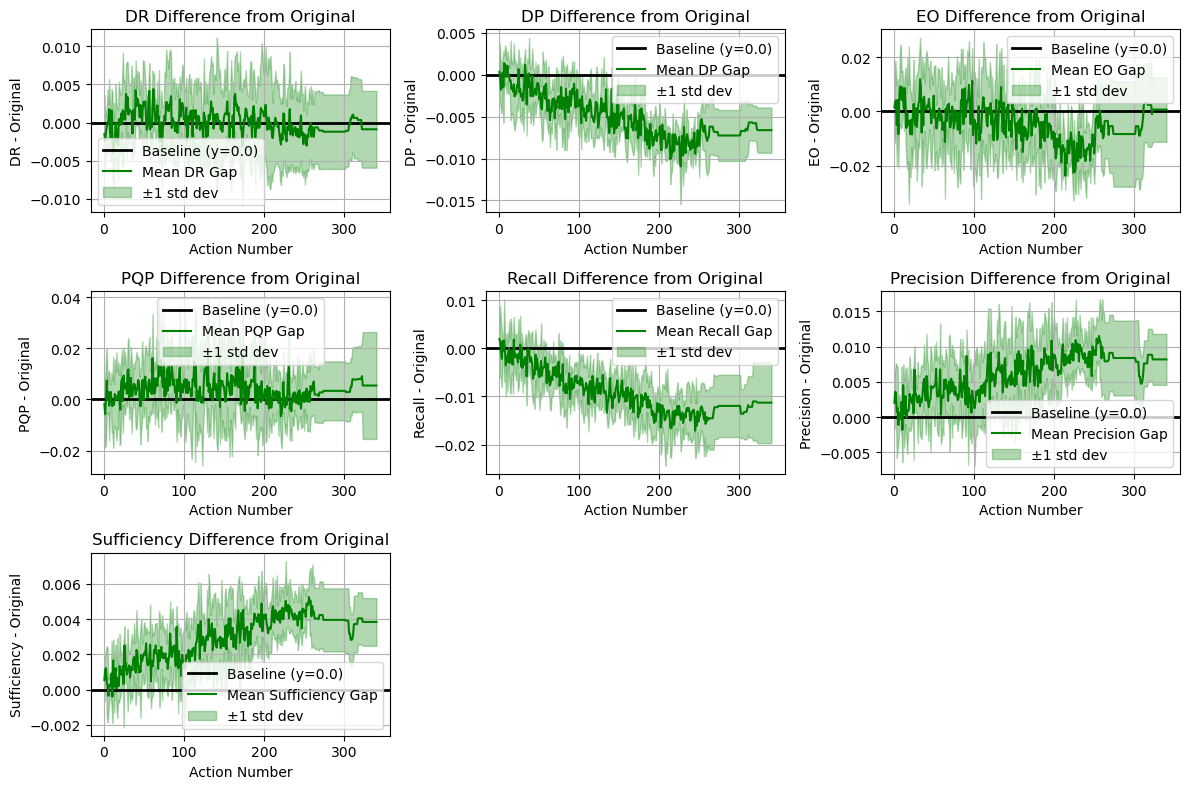

In [13]:
''' DR+precision
 alpha=0.8, DR不行
alpha=0.9
alpha=0.95, DR可以, precision不行

'''

import pandas as pd
import numpy as np

def extract_original_values(fold):
    original_DR = fold.loc[0, 'new_DR']
    original_DP = fold.loc[0, 'new_DP']
    original_EO = fold.loc[0, 'new_EO']
    original_PQP = fold.loc[0, 'new_PQP']
    original_recall = fold.loc[0, 'new_recall']
    original_precision = fold.loc[0, 'new_precision']
    original_sufficiency = fold.loc[0, 'new_sufficiency']
    return original_DR, original_DP, original_EO, original_PQP, original_recall, original_precision, original_sufficiency

fold1 = pd.read_csv('saved_results/adult/fairSHAP-DP_1-fold_results.csv')
fold2 = pd.read_csv('saved_results/adult/fairSHAP-DP_2-fold_results.csv')
fold3 = pd.read_csv('saved_results/adult/fairSHAP-DP_3-fold_results.csv')
fold4 = pd.read_csv('saved_results/adult/fairSHAP-DP_4-fold_results.csv')
fold5 = pd.read_csv('saved_results/adult/fairSHAP-DP_5-fold_results.csv')

fold1_original_values = extract_original_values(fold1)
fold2_original_values = extract_original_values(fold2)
fold3_original_values = extract_original_values(fold3)
fold4_original_values = extract_original_values(fold4)
fold5_original_values = extract_original_values(fold5)

fold1.drop(fold1.index[0], inplace=True)
fold2.drop(fold2.index[0], inplace=True)
fold3.drop(fold3.index[0], inplace=True)
fold4.drop(fold4.index[0], inplace=True)
fold5.drop(fold5.index[0], inplace=True)

folds = [fold1, fold2, fold3, fold4, fold5]
original_drs = [fold1_original_values[0], fold2_original_values[0], fold3_original_values[0], fold4_original_values[0], fold5_original_values[0]]
original_dps = [fold1_original_values[1], fold2_original_values[1], fold3_original_values[1], fold4_original_values[1], fold5_original_values[1]]
original_eos = [fold1_original_values[2], fold2_original_values[2], fold3_original_values[2], fold4_original_values[2], fold5_original_values[2]]
original_pqps = [fold1_original_values[3], fold2_original_values[3], fold3_original_values[3], fold4_original_values[3], fold5_original_values[3]]
original_recalls = [fold1_original_values[4], fold2_original_values[4], fold3_original_values[4], fold4_original_values[4], fold5_original_values[4]]
original_precisions = [fold1_original_values[5], fold2_original_values[5], fold3_original_values[5], fold4_original_values[5], fold5_original_values[5]]
original_sufficiencies = [fold1_original_values[6], fold2_original_values[6], fold3_original_values[6], fold4_original_values[6], fold5_original_values[6]]


from src.visualization.viz3 import plot_fairness_improvement
# 调用函数
plot_fairness_improvement(
    folds=folds,
    original_DR=original_drs, 
    original_DP=original_dps, 
    original_EO=original_eos, 
    original_PQP=original_pqps,
    original_recall=original_recalls,
    original_precision=original_precisions,
    original_sufficiency=original_sufficiencies,
    stop_when_no_data=1,
    min_action=1,
    figsize=(12, 8),
    fill_alpha=0.3,
    fill_color='g',

)
